In [34]:
import numpy as np
import lib.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

In [35]:
def my_exp(x,y,w1,w2):
    if (w1 == 0):
        return np.exp( w2*1j*y)
    return np.exp(w1*1j*x + w2*1j*y)

In [36]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 2)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(1)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    plt.savefig('z-plot-ideal')

In [37]:
def compare_ideal(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi, -np.pi, np.pi, M)
    im = my_exp(x,y,i,j)
    h = 2*np.pi / 2**M
    grad_X, grad_Y = i * 1j * my_exp(x,y,i,j) * h, j * 1j * my_exp(x,y,i,j) * h
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = data.get_Poisson_noise(grad_X.real, photons) + 1j*data.get_Poisson_noise(grad_X.imag, photons)
        grad_Y = data.get_Poisson_noise(grad_Y.real, photons) + 1j*data.get_Poisson_noise(grad_Y.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [38]:
def calc_z_ideal (M, noised = False, photons = 1):
    size = 2**M
    z = np.zeros(size**2).reshape(size,size)
    for i in range (size):
        print(i)
        if (i*10 <= size):
            for j in range(size):
                if (j*10 <= size):
                    z[i,j] = compare_ideal(i,j,M, noised,photons)
                else:
                    break
        else :
            break
    return z

In [39]:
z = calc_z_ideal(5, True, 1)
draw_plot(z[0:z.shape[0] // 10 + 1, 0:z.shape[0] // 10 + 1])

0


/home/satbek/Course-work-sem7/src/lib/data.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  scale_factor = photons / noised_image.max()
/home/satbek/Course-work-sem7/src/lib/data.py:46: RuntimeWarning: invalid value encountered in multiply
  noised_image = noised_image * scale_factor
/home/satbek/Course-work-sem7/src/lib/data.py:47: RuntimeWarning: invalid value encountered in less
  noised_image = np.random.poisson(noised_image)
/home/satbek/Course-work-sem7/src/lib/data.py:47: RuntimeWarning: invalid value encountered in greater
  noised_image = np.random.poisson(noised_image)


1
2


3
4


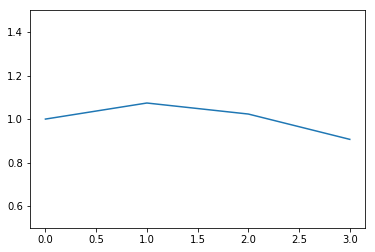

In [32]:
x = np.arange(z.shape[0] // 10 + 1)
y = [z[i,i] for i in range(z.shape[0] // 10 + 1)]
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
plt.ylim(0.5,1.5)
plt.plot(x,y)

In [11]:
x,y = data.get_plane(-np.pi, np.pi, -np.pi, np.pi, 6)
im = my_exp(x,y,3,3)
grad_X, grad_Y = 3 * x * 1j * my_exp(x,y,3,3), 3 * y * 1j * my_exp(x,y,3,3)
LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
res = haar.syntesis({0:np.array([[np.mean(im)*2**6]])}, LH, HL, HH,6)
np.abs(np.fft.fft2(res[6])[3,3])

13907.892690715842

In [12]:
np.abs(np.fft.fft2(im)[3,3])

4065.5422034138596

In [13]:
x, y = data.get_plane(-252,251,-252,251,9)
z = my_exp(x,y,2,2)

In [14]:
z_x = 2j * my_exp(x,y,1,1)

In [15]:
gr_x = grad.Hudgin_gradien_model(z)

In [16]:
gr_x[0]

array([[ 1.65061506-0.22454989j, -0.43256634+1.60867619j,
        -1.31539659-1.0220981j , ..., -1.61781774+0.39701196j,
         0.26086889-1.64526598j,  0.41614684+0.90929743j],
       [-0.43256634+1.60867619j, -1.31539659-1.0220981j ,
         1.45193651-0.81659849j, ...,  0.26086889-1.64526598j,
         1.41565668+0.87799139j, -0.99950985+0.03130604j],
       [-1.31539659-1.0220981j ,  1.45193651-0.81659849j,
         0.19021445+1.65492332j, ...,  1.41565668+0.87799139j,
        -1.35793588+0.96486417j,  0.35842604-0.93355813j],
       ...,
       [-1.61781774+0.39701196j,  0.26086889-1.64526598j,
         1.41565668+0.87799139j, ...,  1.56705281-0.56506478j,
        -0.0862742 +1.66358333j, -0.50952947-0.86045321j],
       [ 0.26086889-1.64526598j,  1.41565668+0.87799139j,
        -1.35793588+0.96486417j, ..., -0.0862742 +1.66358333j,
        -1.50019438-0.72413364j,  0.99066492-0.13631957j],
       [ 1.41565668+0.87799139j, -1.35793588+0.96486417j,
        -0.36332058-1.6257155j

In [17]:
gr_abs = np.abs(np.fft.fft(gr_x[0][0]))

In [18]:
z_x_abs = np.abs(np.fft.fft(z_x[0]))

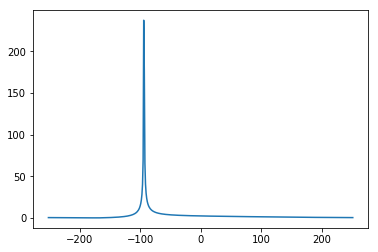

In [21]:
plt.plot(x[0], gr_abs/z_x_abs)

In [22]:
gr_abs/z_x_abs

array([3.83015255e-01, 3.80499790e-01, 3.78010043e-01, 3.75543993e-01,
       3.73099561e-01, 3.70674610e-01, 3.68266947e-01, 3.65874321e-01,
       3.63494429e-01, 3.61124907e-01, 3.58763343e-01, 3.56407266e-01,
       3.54054154e-01, 3.51701433e-01, 3.49346475e-01, 3.46986602e-01,
       3.44619085e-01, 3.42241143e-01, 3.39849944e-01, 3.37442608e-01,
       3.35016203e-01, 3.32567748e-01, 3.30094211e-01, 3.27592510e-01,
       3.25059513e-01, 3.22492037e-01, 3.19886847e-01, 3.17240657e-01,
       3.14550127e-01, 3.11811866e-01, 3.09022425e-01, 3.06178301e-01,
       3.03275933e-01, 3.00311702e-01, 2.97281928e-01, 2.94182869e-01,
       2.91010718e-01, 2.87761602e-01, 2.84431578e-01, 2.81016631e-01,
       2.77512673e-01, 2.73915537e-01, 2.70220974e-01, 2.66424651e-01,
       2.62522146e-01, 2.58508945e-01, 2.54380437e-01, 2.50131907e-01,
       2.45758536e-01, 2.41255390e-01, 2.36617419e-01, 2.31839449e-01,
       2.26916174e-01, 2.21842154e-01, 2.16611803e-01, 2.11219383e-01,
      

In [23]:
z_x_abs/gr_abs

array([2.61086207e+00, 2.62812234e+00, 2.64543236e+00, 2.66280387e+00,
       2.68024974e+00, 2.69778391e+00, 2.71542154e+00, 2.73317897e+00,
       2.75107380e+00, 2.76912497e+00, 2.78735278e+00, 2.80577894e+00,
       2.82442669e+00, 2.84332080e+00, 2.86248774e+00, 2.88195565e+00,
       2.90175455e+00, 2.92191638e+00, 2.94247510e+00, 2.96346690e+00,
       2.98493025e+00, 3.00690613e+00, 3.02943816e+00, 3.05257285e+00,
       3.07635975e+00, 3.10085176e+00, 3.12610540e+00, 3.15218109e+00,
       3.17914352e+00, 3.20706204e+00, 3.23601111e+00, 3.26607078e+00,
       3.29732726e+00, 3.32987357e+00, 3.36381026e+00, 3.39924620e+00,
       3.43629955e+00, 3.47509881e+00, 3.51578404e+00, 3.55850825e+00,
       3.60343904e+00, 3.65076042e+00, 3.70067500e+00, 3.75340644e+00,
       3.80920244e+00, 3.86833809e+00, 3.93111991e+00, 3.99789059e+00,
       4.06903466e+00, 4.14498511e+00, 4.22623154e+00, 4.31332979e+00,
       4.40691371e+00, 4.50770956e+00, 4.61655360e+00, 4.73441399e+00,
      

In [24]:
gr_abs

array([  1.        ,   1.00495172,   1.01012682,   1.01552796,
         1.02115781,   1.02701906,   1.03311439,   1.03944654,
         1.04601823,   1.05283223,   1.05989132,   1.06719832,
         1.07475609,   1.08256752,   1.09063554,   1.09896312,
         1.10755331,   1.11640918,   1.12553389,   1.13493065,
         1.14460274,   1.15455352,   1.16478644,   1.17530503,
         1.18611292,   1.19721384,   1.20861161,   1.22031019,
         1.23231365,   1.24462619,   1.25725213,   1.27019596,
         1.28346231,   1.29705595,   1.31098185,   1.32524513,
         1.33985112,   1.35480532,   1.37011344,   1.38578143,
         1.40181543,   1.41822184,   1.4350073 ,   1.45217869,
         1.4697432 ,   1.48770828,   1.50608167,   1.52487144,
         1.54408597,   1.563734  ,   1.58382461,   1.60436727,
         1.62537182,   1.64684853,   1.6688081 ,   1.69126166,
         1.71422084,   1.73769775,   1.76170501,   1.78625581,
         1.81136389,   1.8370436 ,   1.86330992,   1.89

In [25]:
z_x_abs

array([  2.61086207,   2.64113607,   2.67222218,   2.70415179,
         2.73695796,   2.77067549,   2.80534108,   2.84099341,
         2.87767334,   2.91542401,   2.95429101,   2.99432258,
         3.03556979,   3.07808675,   3.12193085,   3.16716298,
         3.21384786,   3.26205427,   3.31185545,   3.3633294 ,
         3.41655933,   3.47163405,   3.5286485 ,   3.58770423,
         3.64891005,   3.71238264,   3.77824729,   3.84663872,
         3.91770197,   3.99159341,   4.06848187,   4.14854992,
         4.23199525,   4.31903233,   4.40989419,   4.50483448,
         4.60412979,   4.70808234,   4.81702297,   4.93131465,
         5.05135646,   5.17758817,   5.31049562,   5.45061687,
         5.5985494 ,   5.7549586 ,   5.92058763,   6.09626918,
         6.28293933,   6.48165416,   6.69360955,   6.92016514,
         7.16287337,   7.42351488,   7.70414205,   8.00713288,
         8.33525825,   8.69176657,   9.0804912 ,   9.50598844,
         9.97371627,  10.4902691 ,  11.06368973,  11.70